# Modeling and Experimentation of Classifiers
> **Projeto:** Kaggle_Classificadores  
> **Tópico:** Avaliação de Performance via Método de Subespaços Aleatórios (Random Subspace)

---

##   Introdução
Após a fase inicial de limpeza e pré-processamento, observamos que o conjunto de dados apresenta uma **baixa correlação linear** entre os atributos e a variável alvo (`Test Results`). Em um cenário real de Ciência de Dados, quando modelos padrão atingem acurácia insatisfatória, é fundamental investigar se o "ruído" de atributos redundantes está dificultando o aprendizado do modelo através da exploração de subespaços de atributos.

---

##  Design Experimental Atualizado

Implementaremos um pipeline para criar e avaliar **10 datasets distintos**. Esta abordagem visa explorar os extremos da dimensionalidade com testes únicos e aprofundar a análise na zona central (50%) com múltiplas variações para garantir a estabilidade estatística.

###  Estratégia de Densidade de Atributos

| Porcentagem de Atributos | Quantidade de Bases | Objetivo do Teste |
| :--- | :---: | :--- |
| **30%** | 1 | **Filtragem Máxima:** Avaliar se o sinal essencial sobrevive a uma redução severa. |
| **40%** | 1 | **Redução Alta:** Testar o desempenho com menos da metade dos atributos. |
| **50%** | 5 | **Zona de Controle:** 5 variações para medir a estabilidade e variância no ponto médio. |
| **60%** | 1 | **Redução Moderada:** Observar o impacto da remoção de 40% das colunas. |
| **70%** | 1 | **Preservação de Sinal:** Manter a maioria dos dados, removendo apenas ruídos óbvios. |
| **80%** | 1 | **Estabilidade Final:** Testar o modelo em um cenário muito próximo ao dataset completo. |

---

##  Metodologia de Avaliação e Validação Robustas

Para cada uma das 10 bases, seguiremos um protocolo rigoroso de validação cruzada para garantir que os resultados não sejam fruto do acaso:

1. **Sorteio Aleatório:** Seleção de atributos conforme a densidade definida para o experimento.
2. **Modelagem Multi-Algoritmo:** Aplicação paralela de **Random Forest** (Ensemble) e **Decision Tree** (Baseline) para comparar ganhos de complexidade.
3. **Divisão Holdout (70/30):** Separação inicial para validação rápida e geração de métricas de teste.
4. **Validação Cruzada (K-Fold 10-splits):** O dataset será dividido em 10 partes, onde o modelo é treinado e testado 10 vezes alternadamente.
5. **Métricas de Performance:** Registro da Acurácia Simples, **Acurácia Média (K-Fold)** e Desvio Padrão para medir a confiabilidade do modelo.



---

##  Consolidação e Ranking Global

Ao final dos experimentos, os resultados serão unificados em um ranking global ordenado pela performance no **K-Fold**, permitindo identificar qual combinação de modelo e densidade de atributos é a mais eficaz para este problema.

In [116]:
from google.colab import drive
import pandas as pd
import random
from sklearn.model_selection import cross_val_score, KFold, train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
# Mount Google Drive
drive.mount('/content/drive')


path = '/content/drive/MyDrive/Data Science - Kaggle/healthcare_dataset_cleaning.csv'
df = pd.read_csv(path)

print(f"✅ Dataset successfully loaded!")
print(f"Dimensions: {df.shape[0]} rows and {df.shape[1]} columns.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Dataset successfully loaded!
Dimensions: 54966 rows and 22 columns.


In [79]:
df

,Age,Billing Amount,Admission Type,Duration_Hours,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,...,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Test Results
0,0.223684,-0.475803,1,-1.558559,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,0.644737,0.568328,2,-1.096739,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
2,0.828947,0.166675,2,-0.057646,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,0.197368,0.869587,0,1.674178,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2
4,0.394737,-0.801883,1,0.519629,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54961,0.381579,-1.620097,0,1.674178,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
54962,0.631579,0.414005,0,-0.750375,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
54963,0.328947,0.143068,1,1.443268,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2
54964,0.394737,0.484143,0,-1.096739,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2


### 💡 Nota Metodológica: Instanciação de Novos Modelos
Para garantir a integridade do experimento de **Subespaços Aleatórios**, cada subconjunto de dados é processado por uma **nova instância** do classificador.

**Por que não reutilizar o modelo anterior?**
* **Incompatibilidade de Dimensões:** Um modelo treinado em 22 colunas não aceita uma entrada de 11 colunas.
* **Isolamento de Variáveis:** Queremos medir o poder preditivo exclusivo do subconjunto sorteado, sem interferência de pesos aprendidos em atributos ausentes.
* **Reprodutibilidade:** Treinar o modelo do zero em cada base garante que o resultado final dependa exclusivamente da qualidade dos dados selecionados.

#  1. Treinamento de 30% dos Atributos

Nesta etapa, reduzimos drasticamente a dimensionalidade do dataset, mantendo apenas **30% dos atributos preditores**.

**Hipótese:** Ao remover 70% das variáveis, estamos eliminando uma grande quantidade de ruído. Se a acurácia se mantiver estável ou subir, significa que o sinal preditivo está concentrado em poucos atributos. Se cair drasticamente, indica que a informação necessária para a classificação está espalhada de forma diluída por todo o dataset.

> **Configuração:** Geraremos 1 variação (v1)

In [80]:
# 1. Configuração inicial
col_classe = 'Test Results'
colunas_preditoras = [col for col in df.columns if col != col_classe]
porcentagem = 0.3
qtd_atributos = int(len(colunas_preditoras) * porcentagem)

# Dicionários para armazenar os objetos e os nomes das colunas
bases_30 = {}
registro_colunas_30 = {}
print(colunas_preditoras)
print(f"Quantidade de atributos: {qtd_atributos}\nTotal de atributos {len(colunas_preditoras)}.\n")


['Age', 'Billing Amount', 'Admission Type', 'Duration_Hours', 'Gender_Male', 'Blood Type_A-', 'Blood Type_AB+', 'Blood Type_AB-', 'Blood Type_B+', 'Blood Type_B-', 'Blood Type_O+', 'Blood Type_O-', 'Medical Condition_Asthma', 'Medical Condition_Cancer', 'Medical Condition_Diabetes', 'Medical Condition_Hypertension', 'Medical Condition_Obesity', 'Medication_Ibuprofen', 'Medication_Lipitor', 'Medication_Paracetamol', 'Medication_Penicillin']
Quantidade de atributos: 6
Total de atributos 21.



In [81]:
# criação da  base
for i in range(1):

    colunas_sorteadas = random.sample(colunas_preditoras, k=qtd_atributos)

    # Criar o nome identificador
    nome_base = f"base_30_versao_0{i+1}"

    # Criar o novo DataFrame (Feature Subspace)
    bases_30[nome_base] = df[colunas_sorteadas + [col_classe]].copy()

    # Salvar o registro das colunas para saber o que há na base
    registro_colunas_30[nome_base] = colunas_sorteadas

In [82]:
#Visualizar a base
for base in bases_30:
  print(f"Base: {base}")
  print(f"Colunas: {registro_colunas_30[base]}")

Base: base_30_versao_01
Colunas: ['Blood Type_B+', 'Medical Condition_Diabetes', 'Blood Type_A-', 'Medication_Lipitor', 'Age', 'Duration_Hours']


## Treinamento e Avaliação (Subespaços de 30%)

Nesta etapa, submetemos o subconjunto gerado ao processo de modelagem comparativa. Para garantir uma análise robusta, utilizaremos dois classificadores distintos sob as mesmas condições de dados.

### Modelos Utilizados:
* **Random Forest:** Escolhido por sua robustez em lidar com subespaços aleatórios e reduzir o risco de overfitting através do agrupamento de múltiplas árvores.
* **Decision Tree:** Utilizado como baseline de modelo simples para observar como uma única estrutura de decisão se comporta com a redução de dimensionalidade.

### Fluxo de Trabalho:
1. **Separação de Atributos:** Isolamento dos previsores ($X$) e da classe alvo ($y$).
2. **Divisão Holdout:** Aplicação da proporção **70% para treino** e **30% para teste**, utilizando `random_state=0` para garantir a reprodutibilidade dos experimentos.
3. **Validação Cruzada (K-Fold):** Implementação de **10 dobras (splits)** para calcular a acurácia média e o desvio padrão, mitigando variações causadas por sorteios específicos na divisão dos dados.
4. **Avaliação e Log:** Comparação entre a acurácia simples e a performance média do K-Fold, armazenando os resultados em um DataFrame consolidado para auditoria final.

In [83]:
# Lista para armazenar os resultados para a tabela final
resultados_experimento_30 = []

print(" Iniciando treinamento da base (30% de atributos) com RF e Decision Tree...\n")

# Definindo os modelos em um dicionário para facilitar o loop
modelos = {
    'Random Forest': RandomForestClassifier(n_estimators=200, criterion="entropy", random_state=0),
    'Decision Tree': DecisionTreeClassifier(criterion="entropy", random_state=0)
}

for nome_base, df_temp in bases_30.items():
    # Separar X e y
    X_30 = df_temp.drop(columns=[col_classe]).values
    y_30 = df_temp[col_classe].values

    # Divisão Treino e Teste (Holdout)
    X_train, X_test, y_train, y_test = train_test_split(X_30, y_30, test_size=0.3, random_state=0)

    for nome_modelo, clf in modelos.items():
        # 1. Treinamento do Modelo
        clf.fit(X_train, y_train)

        # 2. Previsão e Acurácia Simples
        previsoes = clf.predict(X_test)
        acuracia_30 = accuracy_score(y_test, previsoes)

        # 3. Implementação do K-Fold (Validação Cruzada)
        kfold = KFold(n_splits=10, shuffle=True, random_state=0)
        scores_kfold = cross_val_score(clf, X_30, y_30, cv=kfold)

        # 4. Salvar resultado no log (incluindo o nome do modelo)
        resultados_experimento_30.append({
            'Dataset': nome_base,
            'Modelo': nome_modelo,
            'Qtd Atributos': X_30.shape[1],
            'Acc Simples (%)': acuracia_30 * 100,
            'Acc Média K-Fold (%)': scores_kfold.mean() * 100,
            'Desvio Padrão': scores_kfold.std()
        })

        print(f"✅ {nome_modelo} em {nome_base} Finalizado")
        print(f"   - Acc Simples: {acuracia_30*100:.2f}% | Acc K-Fold: {scores_kfold.mean()*100:.2f}%")



 Iniciando treinamento da base (30% de atributos) com RF e Decision Tree...

✅ Random Forest em base_30_versao_01 Finalizado
   - Acc Simples: 33.09% | Acc K-Fold: 33.53%
✅ Decision Tree em base_30_versao_01 Finalizado
   - Acc Simples: 32.93% | Acc K-Fold: 33.27%


In [85]:
# Gerar DataFrame de Comparação
df_resultados_30 = pd.DataFrame(resultados_experimento_30)
print("\n--- Tabela Comparativa: Experimento 30% ---")
display(df_resultados_30.sort_values(by='Acc Média K-Fold (%)', ascending=False))


--- Tabela Comparativa: Experimento 30% ---


,Dataset,Modelo,Qtd Atributos,Acc Simples (%),Acc Média K-Fold (%),Desvio Padrão
0,base_30_versao_01,Random Forest,6,33.092784,33.526184,0.004099
1,base_30_versao_01,Decision Tree,6,32.929048,33.266009,0.005147


#  2. Treinamento de 40% dos Atributos

Nesta etapa, reduzimos drasticamente a dimensionalidade do dataset, mantendo apenas **40% dos atributos preditores**.

**Hipótese:** Ao remover 70% das variáveis, estamos eliminando uma grande quantidade de ruído. Se a acurácia se mantiver estável ou subir, significa que o sinal preditivo está concentrado em poucos atributos. Se cair drasticamente, indica que a informação necessária para a classificação está espalhada de forma diluída por todo o dataset.

> **Configuração:** Geraremos 1 variação (v1)

In [86]:
# 1. Configuração inicial
col_classe = 'Test Results'  # Certifique-se de que este é o nome da sua coluna alvo
colunas_preditoras = [col for col in df.columns if col != col_classe]
porcentagem = 0.4
qtd_atributos = int(len(colunas_preditoras) * porcentagem)

# Dicionários para armazenar os objetos e os nomes das colunas
bases_40 = {}
registro_colunas_40 = {}
print(colunas_preditoras)
print(f"Quantidade de atributos: {qtd_atributos}\nTotal de atributos {len(colunas_preditoras)}.\n")

['Age', 'Billing Amount', 'Admission Type', 'Duration_Hours', 'Gender_Male', 'Blood Type_A-', 'Blood Type_AB+', 'Blood Type_AB-', 'Blood Type_B+', 'Blood Type_B-', 'Blood Type_O+', 'Blood Type_O-', 'Medical Condition_Asthma', 'Medical Condition_Cancer', 'Medical Condition_Diabetes', 'Medical Condition_Hypertension', 'Medical Condition_Obesity', 'Medication_Ibuprofen', 'Medication_Lipitor', 'Medication_Paracetamol', 'Medication_Penicillin']
Quantidade de atributos: 8
Total de atributos 21.



In [87]:
# Criação da  base
for i in range(1):

    colunas_sorteadas = random.sample(colunas_preditoras, k=qtd_atributos)

    # Criar o nome identificador
    nome_base = f"base_40_versao_0{i+1}"

    # Criar o novo DataFrame (Feature Subspace)
    bases_40[nome_base] = df[colunas_sorteadas + [col_classe]].copy()

    # Salvar o registro das colunas para saber o que há na base
    registro_colunas_40[nome_base] = colunas_sorteadas

In [88]:
#Visualizar a base
for base in bases_40:
  print(f"Base: {base}")
  print(f"Colunas: {registro_colunas_40[base]}")

Base: base_40_versao_01
Colunas: ['Blood Type_A-', 'Medication_Ibuprofen', 'Medical Condition_Cancer', 'Medication_Paracetamol', 'Blood Type_O-', 'Blood Type_B+', 'Blood Type_B-', 'Blood Type_O+']


## Treinamento e Avaliação (Subespaços de 40%)

Nesta etapa, submetemos o subconjunto gerado ao processo de modelagem comparativa. Para garantir uma análise robusta, utilizaremos dois classificadores distintos sob as mesmas condições de dados.

### Modelos Utilizados:
* **Random Forest:** Escolhido por sua robustez em lidar com subespaços aleatórios e reduzir o risco de overfitting através do agrupamento de múltiplas árvores.
* **Decision Tree:** Utilizado como baseline de modelo simples para observar como uma única estrutura de decisão se comporta com a redução de dimensionalidade.

### Fluxo de Trabalho:
1. **Separação de Atributos:** Isolamento dos previsores ($X$) e da classe alvo ($y$).
2. **Divisão Holdout:** Aplicação da proporção **70% para treino** e **30% para teste**, utilizando `random_state=0` para garantir a reprodutibilidade dos experimentos.
3. **Validação Cruzada (K-Fold):** Implementação de **10 dobras (splits)** para calcular a acurácia média e o desvio padrão, mitigando variações causadas por sorteios específicos na divisão dos dados.
4. **Avaliação e Log:** Comparação entre a acurácia simples e a performance média do K-Fold, armazenando os resultados em um DataFrame consolidado para auditoria final.

In [89]:
# Lista para armazenar os resultados para a tabela final
resultados_experimento_40 = []

print(" Iniciando treinamento da base (40% de atributos) com RF e Decision Tree...\n")

# Definindo os modelos em um dicionário para facilitar o loop
modelos = {
    'Random Forest': RandomForestClassifier(n_estimators=200, criterion="entropy", random_state=0),
    'Decision Tree': DecisionTreeClassifier(criterion="entropy", random_state=0)
}

for nome_base, df_temp in bases_40.items():
    # Separar X e y
    X_40 = df_temp.drop(columns=[col_classe]).values
    y_40 = df_temp[col_classe].values

    # Divisão Treino e Teste (Holdout)
    X_train, X_test, y_train, y_test = train_test_split(X_40, y_40, test_size=0.3, random_state=0)

    for nome_modelo, clf in modelos.items():
        # 1. Treinamento do Modelo
        clf.fit(X_train, y_train)

        # 2. Previsão e Acurácia Simples
        previsoes = clf.predict(X_test)
        acuracia_40 = accuracy_score(y_test, previsoes)

        # 3. Implementação do K-Fold (Validação Cruzada)
        kfold = KFold(n_splits=10, shuffle=True, random_state=0)
        scores_kfold = cross_val_score(clf, X_40, y_40, cv=kfold)

        # 4. Salvar resultado no log (incluindo o nome do modelo)
        resultados_experimento_40.append({
            'Dataset': nome_base,
            'Modelo': nome_modelo,
            'Qtd Atributos': X_40.shape[1],
            'Acc Simples (%)': acuracia_40 * 100,
            'Acc Média K-Fold (%)': scores_kfold.mean() * 100,
            'Desvio Padrão': scores_kfold.std()
        })

        print(f"✅ {nome_modelo} em {nome_base} Finalizado")
        print(f"   - Acc Simples: {acuracia_40*100:.2f}% | Acc K-Fold: {scores_kfold.mean()*100:.2f}%")

 Iniciando treinamento da base (40% de atributos) com RF e Decision Tree...

✅ Random Forest em base_40_versao_01 Finalizado
   - Acc Simples: 32.98% | Acc K-Fold: 33.29%
✅ Decision Tree em base_40_versao_01 Finalizado
   - Acc Simples: 33.09% | Acc K-Fold: 33.30%


In [90]:
# Gerar DataFrame de Comparação
df_resultados_40 = pd.DataFrame(resultados_experimento_40)
print("\n--- Tabela Comparativa: Experimento 40% ---")
display(df_resultados_40.sort_values(by='Acc Média K-Fold (%)', ascending=False))


--- Tabela Comparativa: Experimento 40% ---


,Dataset,Modelo,Qtd Atributos,Acc Simples (%),Acc Média K-Fold (%),Desvio Padrão
1,base_40_versao_01,Decision Tree,8,33.086719,33.302411,0.004602
0,base_40_versao_01,Random Forest,8,32.983626,33.289674,0.004837


#  3. Treinamento de 50% dos Atributos

Nesta fase, criaremos as primeiras **5 variações** do dataset, cada uma contendo exatamente **50% dos atributos preditores** originais, escolhidos de forma aleatória.

**Objetivos desta etapa:**
1.  Isolar subconjuntos de dados para identificar combinações com menor ruído.
2.  Registrar formalmente a composição de cada base para futura auditoria.
3.  Preparar os dados para o treinamento individualizado.

> **Regra de Sorteio:** A coluna alvo (`target`) é preservada em todas as bases, enquanto as demais são sorteadas sem repetição dentro do mesmo conjunto.

In [91]:
# 1. Configuração inicial
col_classe = 'Test Results'  # Certifique-se de que este é o nome da sua coluna alvo
colunas_preditoras = [col for col in df.columns if col != col_classe]
porcentagem = 0.5
qtd_atributos = int(len(colunas_preditoras) * porcentagem)

# Dicionários para armazenar os objetos e os nomes das colunas
bases_50 = {}
registro_colunas_50 = {}
print(colunas_preditoras)
print(f"Quantidade de atributos: {qtd_atributos}\nTotal de atributos {len(colunas_preditoras)}.\n")



['Age', 'Billing Amount', 'Admission Type', 'Duration_Hours', 'Gender_Male', 'Blood Type_A-', 'Blood Type_AB+', 'Blood Type_AB-', 'Blood Type_B+', 'Blood Type_B-', 'Blood Type_O+', 'Blood Type_O-', 'Medical Condition_Asthma', 'Medical Condition_Cancer', 'Medical Condition_Diabetes', 'Medical Condition_Hypertension', 'Medical Condition_Obesity', 'Medication_Ibuprofen', 'Medication_Lipitor', 'Medication_Paracetamol', 'Medication_Penicillin']
Quantidade de atributos: 10
Total de atributos 21.



In [92]:
# Loop de criação das 5 bases
for i in range(1, 6):

    colunas_sorteadas = random.sample(colunas_preditoras, k=qtd_atributos)

    # Criar o nome identificador
    nome_base = f"base_50_versao_0{i}"

    # Criar o novo DataFrame (Feature Subspace)
    bases_50[nome_base] = df[colunas_sorteadas + [col_classe]].copy()

    # Salvar o registro das colunas para saber o que há na base
    registro_colunas_50[nome_base] = colunas_sorteadas



In [93]:
#Visualizar as bases
for base in bases_50:
  print(f"Base: {base}")
  print(f"Colunas: {registro_colunas_50[base]}")

Base: base_50_versao_01
Colunas: ['Blood Type_B-', 'Billing Amount', 'Medical Condition_Hypertension', 'Medication_Penicillin', 'Blood Type_AB+', 'Medication_Paracetamol', 'Blood Type_O+', 'Medical Condition_Obesity', 'Duration_Hours', 'Age']
Base: base_50_versao_02
Colunas: ['Age', 'Blood Type_AB-', 'Duration_Hours', 'Blood Type_O+', 'Blood Type_B-', 'Medication_Ibuprofen', 'Blood Type_B+', 'Admission Type', 'Billing Amount', 'Medication_Lipitor']
Base: base_50_versao_03
Colunas: ['Blood Type_O+', 'Duration_Hours', 'Medical Condition_Hypertension', 'Medication_Paracetamol', 'Medical Condition_Diabetes', 'Medication_Penicillin', 'Medical Condition_Asthma', 'Blood Type_AB+', 'Medication_Lipitor', 'Blood Type_B+']
Base: base_50_versao_04
Colunas: ['Duration_Hours', 'Medication_Ibuprofen', 'Admission Type', 'Gender_Male', 'Age', 'Medical Condition_Hypertension', 'Blood Type_B-', 'Blood Type_AB+', 'Blood Type_O-', 'Blood Type_AB-']
Base: base_50_versao_05
Colunas: ['Billing Amount', 'Blood

## Treinamento e Avaliação (Subespaços de 50%)

Nesta etapa, submetemos os subconjuntos gerados ao processo de modelagem comparativa. Para garantir uma análise robusta, utilizaremos dois classificadores distintos sob as mesmas condições de dados.

### Modelos Utilizados:
* **Random Forest:** Escolhido por sua robustez em lidar com subespaços aleatórios e reduzir o risco de overfitting através do agrupamento de múltiplas árvores.
* **Decision Tree:** Utilizado como baseline de modelo simples para observar como uma única estrutura de decisão se comporta com a redução de dimensionalidade.

### Fluxo de Trabalho:
1. **Separação de Atributos:** Isolamento dos previsores ($X$) e da classe alvo ($y$).
2. **Divisão Holdout:** Aplicação da proporção **70% para treino** e **30% para teste**, utilizando `random_state=0` para garantir a reprodutibilidade dos experimentos.
3. **Validação Cruzada (K-Fold):** Implementação de **10 dobras (splits)** para calcular a acurácia média e o desvio padrão, mitigando variações causadas por sorteios específicos na divisão dos dados.
4. **Avaliação e Log:** Comparação entre a acurácia simples e a performance média do K-Fold, armazenando os resultados em um DataFrame consolidado para auditoria final.

In [94]:

# Lista para armazenar os resultados para a tabela final
resultados_experimento_50 = []

print(" Iniciando treinamento da base (50% de atributos) com RF e Decision Tree...\n")

# Definindo os modelos em um dicionário para facilitar o loop
modelos = {
    'Random Forest': RandomForestClassifier(n_estimators=200, criterion="entropy", random_state=0),
    'Decision Tree': DecisionTreeClassifier(criterion="entropy", random_state=0)
}

for nome_base, df_temp in bases_50.items():
    # Separar X e y
    X_50 = df_temp.drop(columns=[col_classe]).values
    y_50 = df_temp[col_classe].values

    # Divisão Treino e Teste (Holdout)
    X_train, X_test, y_train, y_test = train_test_split(X_50, y_50, test_size=0.3, random_state=0)

    for nome_modelo, clf in modelos.items():
        # 1. Treinamento do Modelo
        clf.fit(X_train, y_train)

        # 2. Previsão e Acurácia Simples
        previsoes = clf.predict(X_test)
        acuracia_50 = accuracy_score(y_test, previsoes)

        # 3. Implementação do K-Fold (Validação Cruzada)
        kfold = KFold(n_splits=10, shuffle=True, random_state=0)
        scores_kfold = cross_val_score(clf, X_50, y_50, cv=kfold)

        # 4. Salvar resultado no log (incluindo o nome do modelo)
        resultados_experimento_50.append({
            'Dataset': nome_base,
            'Modelo': nome_modelo,
            'Qtd Atributos': X_50.shape[1],
            'Acc Simples (%)': acuracia_50 * 100,
            'Acc Média K-Fold (%)': scores_kfold.mean() * 100,
            'Desvio Padrão': scores_kfold.std()
        })

        print(f"✅ {nome_modelo} em {nome_base} Finalizado")
        print(f"   - Acc Simples: {acuracia_50*100:.2f}% | Acc K-Fold: {scores_kfold.mean()*100:.2f}%")


 Iniciando treinamento da base (50% de atributos) com RF e Decision Tree...

✅ Random Forest em base_50_versao_01 Finalizado
   - Acc Simples: 38.72% | Acc K-Fold: 40.33%
✅ Decision Tree em base_50_versao_01 Finalizado
   - Acc Simples: 38.41% | Acc K-Fold: 39.22%
✅ Random Forest em base_50_versao_02 Finalizado
   - Acc Simples: 39.51% | Acc K-Fold: 41.26%
✅ Decision Tree em base_50_versao_02 Finalizado
   - Acc Simples: 37.40% | Acc K-Fold: 39.45%
✅ Random Forest em base_50_versao_03 Finalizado
   - Acc Simples: 34.37% | Acc K-Fold: 34.41%
✅ Decision Tree em base_50_versao_03 Finalizado
   - Acc Simples: 34.15% | Acc K-Fold: 34.31%
✅ Random Forest em base_50_versao_04 Finalizado
   - Acc Simples: 34.60% | Acc K-Fold: 35.34%
✅ Decision Tree em base_50_versao_04 Finalizado
   - Acc Simples: 33.52% | Acc K-Fold: 33.96%
✅ Random Forest em base_50_versao_05 Finalizado
   - Acc Simples: 34.88% | Acc K-Fold: 35.66%
✅ Decision Tree em base_50_versao_05 Finalizado
   - Acc Simples: 37.39% | Ac

In [95]:
# Gerar DataFrame de Comparação
df_resultados_50 = pd.DataFrame(resultados_experimento_50)
print("\n--- Tabela Comparativa: Experimento 50% ---")
display(df_resultados_50.sort_values(by='Acc Média K-Fold (%)', ascending=False))


--- Tabela Comparativa: Experimento 50% ---


,Dataset,Modelo,Qtd Atributos,Acc Simples (%),Acc Média K-Fold (%),Desvio Padrão
2,base_50_versao_02,Random Forest,10,39.508793,41.263695,0.005213
0,base_50_versao_01,Random Forest,10,38.720437,40.332220,0.007259
3,base_50_versao_02,Decision Tree,10,37.404488,39.446220,0.006748
1,base_50_versao_01,Decision Tree,10,38.411158,39.215159,0.005405
9,base_50_versao_05,Decision Tree,10,37.386295,37.938027,0.005979
8,base_50_versao_05,Random Forest,10,34.881747,35.663895,0.007020
6,base_50_versao_04,Random Forest,10,34.596725,35.336399,0.008112
4,base_50_versao_03,Random Forest,10,34.372347,34.413993,0.005719
5,base_50_versao_03,Decision Tree,10,34.147968,34.310300,0.006386
7,base_50_versao_04,Decision Tree,10,33.517283,33.957400,0.009115


#  4. Treinamento de 60% dos Atributos

Nesta etapa, reduzimos drasticamente a dimensionalidade do dataset, mantendo apenas **60% dos atributos preditores**.

**Hipótese:** Ao remover 70% das variáveis, estamos eliminando uma grande quantidade de ruído. Se a acurácia se mantiver estável ou subir, significa que o sinal preditivo está concentrado em poucos atributos. Se cair drasticamente, indica que a informação necessária para a classificação está espalhada de forma diluída por todo o dataset.

> **Configuração:** Geraremos 1 variação (v1)

In [96]:
# 1. Configuração inicial
col_classe = 'Test Results'  # Certifique-se de que este é o nome da sua coluna alvo
colunas_preditoras = [col for col in df.columns if col != col_classe]
porcentagem = 0.6
qtd_atributos = int(len(colunas_preditoras) * porcentagem)

# Dicionários para armazenar os objetos e os nomes das colunas
bases_60 = {}
registro_colunas_60 = {}
print(colunas_preditoras)
print(f"Quantidade de atributos: {qtd_atributos}\nTotal de atributos {len(colunas_preditoras)}.\n")

['Age', 'Billing Amount', 'Admission Type', 'Duration_Hours', 'Gender_Male', 'Blood Type_A-', 'Blood Type_AB+', 'Blood Type_AB-', 'Blood Type_B+', 'Blood Type_B-', 'Blood Type_O+', 'Blood Type_O-', 'Medical Condition_Asthma', 'Medical Condition_Cancer', 'Medical Condition_Diabetes', 'Medical Condition_Hypertension', 'Medical Condition_Obesity', 'Medication_Ibuprofen', 'Medication_Lipitor', 'Medication_Paracetamol', 'Medication_Penicillin']
Quantidade de atributos: 12
Total de atributos 21.



In [97]:
# Criação da base
for i in range(1):

    colunas_sorteadas = random.sample(colunas_preditoras, k=qtd_atributos)

    # Criar o nome identificador
    nome_base = f"base_60_versao_0{i+1}"

    # Criar o novo DataFrame (Feature Subspace)
    bases_60[nome_base] = df[colunas_sorteadas + [col_classe]].copy()

    # Salvar o registro das colunas para saber o que há na base
    registro_colunas_60[nome_base] = colunas_sorteadas

In [98]:
#Visualizar a base
for base in bases_60:
  print(f"Base: {base}")
  print(f"Colunas: {registro_colunas_60[base]}")

Base: base_60_versao_01
Colunas: ['Blood Type_O+', 'Billing Amount', 'Medical Condition_Obesity', 'Blood Type_B+', 'Medication_Lipitor', 'Blood Type_AB+', 'Blood Type_A-', 'Blood Type_AB-', 'Medical Condition_Cancer', 'Blood Type_B-', 'Age', 'Admission Type']


## Treinamento e Avaliação (Subespaços de 60%)

Nesta etapa, submetemos o subconjunto gerado ao processo de modelagem comparativa. Para garantir uma análise robusta, utilizaremos dois classificadores distintos sob as mesmas condições de dados.

### Modelos Utilizados:
* **Random Forest:** Escolhido por sua robustez em lidar com subespaços aleatórios e reduzir o risco de overfitting através do agrupamento de múltiplas árvores.
* **Decision Tree:** Utilizado como baseline de modelo simples para observar como uma única estrutura de decisão se comporta com a redução de dimensionalidade.

### Fluxo de Trabalho:
1. **Separação de Atributos:** Isolamento dos previsores ($X$) e da classe alvo ($y$).
2. **Divisão Holdout:** Aplicação da proporção **70% para treino** e **30% para teste**, utilizando `random_state=0` para garantir a reprodutibilidade dos experimentos.
3. **Validação Cruzada (K-Fold):** Implementação de **10 dobras (splits)** para calcular a acurácia média e o desvio padrão, mitigando variações causadas por sorteios específicos na divisão dos dados.
4. **Avaliação e Log:** Comparação entre a acurácia simples e a performance média do K-Fold, armazenando os resultados em um DataFrame consolidado para auditoria final.

In [99]:
# Lista para armazenar os resultados para a tabela final
resultados_experimento_60 = []

print(" Iniciando treinamento da base (60% de atributos) com RF e Decision Tree...\n")

# Definindo os modelos em um dicionário para facilitar o loop
modelos = {
    'Random Forest': RandomForestClassifier(n_estimators=200, criterion="entropy", random_state=0),
    'Decision Tree': DecisionTreeClassifier(criterion="entropy", random_state=0)
}

for nome_base, df_temp in bases_60.items():
    # Separar X e y
    X_60 = df_temp.drop(columns=[col_classe]).values
    y_60 = df_temp[col_classe].values

    # Divisão Treino e Teste (Holdout)
    X_train, X_test, y_train, y_test = train_test_split(X_60, y_60, test_size=0.3, random_state=0)

    for nome_modelo, clf in modelos.items():
        # 1. Treinamento do Modelo
        clf.fit(X_train, y_train)

        # 2. Previsão e Acurácia Simples
        previsoes = clf.predict(X_test)
        acuracia_60 = accuracy_score(y_test, previsoes)

        # 3. Implementação do K-Fold (Validação Cruzada)
        kfold = KFold(n_splits=10, shuffle=True, random_state=0)
        scores_kfold = cross_val_score(clf, X_60, y_60, cv=kfold)

        # 4. Salvar resultado no log (incluindo o nome do modelo)
        resultados_experimento_60.append({
            'Dataset': nome_base,
            'Modelo': nome_modelo,
            'Qtd Atributos': X_60.shape[1],
            'Acc Simples (%)': acuracia_60 * 100,
            'Acc Média K-Fold (%)': scores_kfold.mean() * 100,
            'Desvio Padrão': scores_kfold.std()
        })

        print(f"✅ {nome_modelo} em {nome_base} Finalizado")
        print(f"   - Acc Simples: {acuracia_60*100:.2f}% | Acc K-Fold: {scores_kfold.mean()*100:.2f}%")

 Iniciando treinamento da base (60% de atributos) com RF e Decision Tree...

✅ Random Forest em base_60_versao_01 Finalizado
   - Acc Simples: 37.42% | Acc K-Fold: 37.73%
✅ Decision Tree em base_60_versao_01 Finalizado
   - Acc Simples: 37.36% | Acc K-Fold: 38.76%


In [100]:
# Gerar DataFrame de Comparação
df_resultados_60 = pd.DataFrame(resultados_experimento_60)
print("\n--- Tabela Comparativa: Experimento 60% ---")
display(df_resultados_60.sort_values(by='Acc Média K-Fold (%)', ascending=False))


--- Tabela Comparativa: Experimento 60% ---


,Dataset,Modelo,Qtd Atributos,Acc Simples (%),Acc Média K-Fold (%),Desvio Padrão
1,base_60_versao_01,Decision Tree,12,37.362038,38.763956,0.00415
0,base_60_versao_01,Random Forest,12,37.422680,37.734267,0.00731


#  4. Treinamento de 70% dos Atributos

Nesta etapa, reduzimos drasticamente a dimensionalidade do dataset, mantendo apenas **70% dos atributos preditores**.

**Hipótese:** Ao remover 70% das variáveis, estamos eliminando uma grande quantidade de ruído. Se a acurácia se mantiver estável ou subir, significa que o sinal preditivo está concentrado em poucos atributos. Se cair drasticamente, indica que a informação necessária para a classificação está espalhada de forma diluída por todo o dataset.

> **Configuração:** Geraremos 1 variação (v1)

In [101]:
# 1. Configuração inicial
col_classe = 'Test Results'  # Certifique-se de que este é o nome da sua coluna alvo
colunas_preditoras = [col for col in df.columns if col != col_classe]
porcentagem = 0.7
qtd_atributos = int(len(colunas_preditoras) * porcentagem)

# Dicionários para armazenar os objetos e os nomes das colunas
bases_70 = {}
registro_colunas_70 = {}
print(colunas_preditoras)
print(f"Quantidade de atributos: {qtd_atributos}\nTotal de atributos {len(colunas_preditoras)}.\n")

['Age', 'Billing Amount', 'Admission Type', 'Duration_Hours', 'Gender_Male', 'Blood Type_A-', 'Blood Type_AB+', 'Blood Type_AB-', 'Blood Type_B+', 'Blood Type_B-', 'Blood Type_O+', 'Blood Type_O-', 'Medical Condition_Asthma', 'Medical Condition_Cancer', 'Medical Condition_Diabetes', 'Medical Condition_Hypertension', 'Medical Condition_Obesity', 'Medication_Ibuprofen', 'Medication_Lipitor', 'Medication_Paracetamol', 'Medication_Penicillin']
Quantidade de atributos: 14
Total de atributos 21.



In [102]:
# Criação da base
for i in range(1):

    colunas_sorteadas = random.sample(colunas_preditoras, k=qtd_atributos)

    # Criar o nome identificador
    nome_base = f"base_70_versao_0{i+1}"

    # Criar o novo DataFrame (Feature Subspace)
    bases_70[nome_base] = df[colunas_sorteadas + [col_classe]].copy()

    # Salvar o registro das colunas para saber o que há na base
    registro_colunas_70[nome_base] = colunas_sorteadas

In [103]:
#Visualizar a base
for base in bases_70:
  print(f"Base: {base}")
  print(f"Colunas: {registro_colunas_70[base]}")

Base: base_70_versao_01
Colunas: ['Medication_Ibuprofen', 'Medication_Lipitor', 'Blood Type_A-', 'Medication_Paracetamol', 'Blood Type_O-', 'Medical Condition_Diabetes', 'Medication_Penicillin', 'Blood Type_AB+', 'Medical Condition_Cancer', 'Medical Condition_Hypertension', 'Medical Condition_Asthma', 'Medical Condition_Obesity', 'Billing Amount', 'Gender_Male']


## Treinamento e Avaliação (Subespaços de 70%)

Nesta etapa, submetemos o subconjunto gerado ao processo de modelagem comparativa. Para garantir uma análise robusta, utilizaremos dois classificadores distintos sob as mesmas condições de dados.

### Modelos Utilizados:
* **Random Forest:** Escolhido por sua robustez em lidar com subespaços aleatórios e reduzir o risco de overfitting através do agrupamento de múltiplas árvores.
* **Decision Tree:** Utilizado como baseline de modelo simples para observar como uma única estrutura de decisão se comporta com a redução de dimensionalidade.

### Fluxo de Trabalho:
1. **Separação de Atributos:** Isolamento dos previsores ($X$) e da classe alvo ($y$).
2. **Divisão Holdout:** Aplicação da proporção **70% para treino** e **30% para teste**, utilizando `random_state=0` para garantir a reprodutibilidade dos experimentos.
3. **Validação Cruzada (K-Fold):** Implementação de **10 dobras (splits)** para calcular a acurácia média e o desvio padrão, mitigando variações causadas por sorteios específicos na divisão dos dados.
4. **Avaliação e Log:** Comparação entre a acurácia simples e a performance média do K-Fold, armazenando os resultados em um DataFrame consolidado para auditoria final.

In [104]:
# Lista para armazenar os resultados para a tabela final
resultados_experimento_70 = []

print(" Iniciando treinamento da base (70% de atributos) com RF e Decision Tree...\n")

# Definindo os modelos em um dicionário para facilitar o loop
modelos = {
    'Random Forest': RandomForestClassifier(n_estimators=200, criterion="entropy", random_state=0),
    'Decision Tree': DecisionTreeClassifier(criterion="entropy", random_state=0)
}

for nome_base, df_temp in bases_70.items():
    # Separar X e y
    X_70 = df_temp.drop(columns=[col_classe]).values
    y_70 = df_temp[col_classe].values

    # Divisão Treino e Teste (Holdout)
    X_train, X_test, y_train, y_test = train_test_split(X_70, y_70, test_size=0.3, random_state=0)

    for nome_modelo, clf in modelos.items():
        # 1. Treinamento do Modelo
        clf.fit(X_train, y_train)

        # 2. Previsão e Acurácia Simples
        previsoes = clf.predict(X_test)
        acuracia_70 = accuracy_score(y_test, previsoes)

        # 3. Implementação do K-Fold (Validação Cruzada)
        kfold = KFold(n_splits=10, shuffle=True, random_state=0)
        scores_kfold = cross_val_score(clf, X_70, y_70, cv=kfold)

        # 4. Salvar resultado no log (incluindo o nome do modelo)
        resultados_experimento_70.append({
            'Dataset': nome_base,
            'Modelo': nome_modelo,
            'Qtd Atributos': X_70.shape[1],
            'Acc Simples (%)': acuracia_70 * 100,
            'Acc Média K-Fold (%)': scores_kfold.mean() * 100,
            'Desvio Padrão': scores_kfold.std()
        })

        print(f"✅ {nome_modelo} em {nome_base} Finalizado")
        print(f"   - Acc Simples: {acuracia_70*100:.2f}% | Acc K-Fold: {scores_kfold.mean()*100:.2f}%")



 Iniciando treinamento da base (70% de atributos) com RF e Decision Tree...

✅ Random Forest em base_70_versao_01 Finalizado
   - Acc Simples: 41.66% | Acc K-Fold: 44.30%
✅ Decision Tree em base_70_versao_01 Finalizado
   - Acc Simples: 41.63% | Acc K-Fold: 44.03%


In [105]:
# Gerar DataFrame de Comparação
df_resultados_70 = pd.DataFrame(resultados_experimento_70)
print("\n--- Tabela Comparativa: Experimento 70% ---")
display(df_resultados_70.sort_values(by='Acc Média K-Fold (%)', ascending=False))




--- Tabela Comparativa: Experimento 70% ---


,Dataset,Modelo,Qtd Atributos,Acc Simples (%),Acc Média K-Fold (%),Desvio Padrão
0,base_70_versao_01,Random Forest,14,41.655549,44.301955,0.007030
1,base_70_versao_01,Decision Tree,14,41.625227,44.034512,0.007631


#  5. Treinamento de 80% dos Atributos

Nesta etapa, reduzimos drasticamente a dimensionalidade do dataset, mantendo apenas **80% dos atributos preditores**.

**Hipótese:** Ao remover 70% das variáveis, estamos eliminando uma grande quantidade de ruído. Se a acurácia se mantiver estável ou subir, significa que o sinal preditivo está concentrado em poucos atributos. Se cair drasticamente, indica que a informação necessária para a classificação está espalhada de forma diluída por todo o dataset.

> **Configuração:** Geraremos 1 variação (v1)

In [106]:
# 1. Configuração inicial
col_classe = 'Test Results'  # Certifique-se de que este é o nome da sua coluna alvo
colunas_preditoras = [col for col in df.columns if col != col_classe]
porcentagem = 0.8
qtd_atributos = int(len(colunas_preditoras) * porcentagem)

# Dicionários para armazenar os objetos e os nomes das colunas
bases_80 = {}
registro_colunas_80 = {}
print(colunas_preditoras)
print(f"Quantidade de atributos: {qtd_atributos}\nTotal de atributos {len(colunas_preditoras)}.\n")

['Age', 'Billing Amount', 'Admission Type', 'Duration_Hours', 'Gender_Male', 'Blood Type_A-', 'Blood Type_AB+', 'Blood Type_AB-', 'Blood Type_B+', 'Blood Type_B-', 'Blood Type_O+', 'Blood Type_O-', 'Medical Condition_Asthma', 'Medical Condition_Cancer', 'Medical Condition_Diabetes', 'Medical Condition_Hypertension', 'Medical Condition_Obesity', 'Medication_Ibuprofen', 'Medication_Lipitor', 'Medication_Paracetamol', 'Medication_Penicillin']
Quantidade de atributos: 16
Total de atributos 21.



In [107]:
# Criação da base
for i in range(1):

    colunas_sorteadas = random.sample(colunas_preditoras, k=qtd_atributos)

    # Criar o nome identificador
    nome_base = f"base_80_versao_0{i+1}"

    # Criar o novo DataFrame (Feature Subspace)
    bases_80[nome_base] = df[colunas_sorteadas + [col_classe]].copy()

    # Salvar o registro das colunas para saber o que há na base
    registro_colunas_80[nome_base] = colunas_sorteadas

In [108]:
#Visualizar a base
for base in bases_80:
  print(f"Base: {base}")
  print(f"Colunas: {registro_colunas_80[base]}")

Base: base_80_versao_01
Colunas: ['Age', 'Medical Condition_Diabetes', 'Medication_Ibuprofen', 'Medical Condition_Asthma', 'Blood Type_B-', 'Admission Type', 'Medication_Lipitor', 'Blood Type_O-', 'Medication_Paracetamol', 'Billing Amount', 'Duration_Hours', 'Medical Condition_Obesity', 'Gender_Male', 'Blood Type_AB+', 'Blood Type_AB-', 'Medical Condition_Cancer']


## Treinamento e Avaliação (Subespaços de 80%)

Nesta etapa, submetemos o subconjunto gerado ao processo de modelagem comparativa. Para garantir uma análise robusta, utilizaremos dois classificadores distintos sob as mesmas condições de dados.

### Modelos Utilizados:
* **Random Forest:** Escolhido por sua robustez em lidar com subespaços aleatórios e reduzir o risco de overfitting através do agrupamento de múltiplas árvores.
* **Decision Tree:** Utilizado como baseline de modelo simples para observar como uma única estrutura de decisão se comporta com a redução de dimensionalidade.

### Fluxo de Trabalho:
1. **Separação de Atributos:** Isolamento dos previsores ($X$) e da classe alvo ($y$).
2. **Divisão Holdout:** Aplicação da proporção **70% para treino** e **30% para teste**, utilizando `random_state=0` para garantir a reprodutibilidade dos experimentos.
3. **Validação Cruzada (K-Fold):** Implementação de **10 dobras (splits)** para calcular a acurácia média e o desvio padrão, mitigando variações causadas por sorteios específicos na divisão dos dados.
4. **Avaliação e Log:** Comparação entre a acurácia simples e a performance média do K-Fold, armazenando os resultados em um DataFrame consolidado para auditoria final.

In [109]:
# Lista para armazenar os resultados para a tabela final
resultados_experimento_80 = []

print(" Iniciando treinamento da base (80% de atributos) com RF e Decision Tree...\n")

# Definindo os modelos em um dicionário para facilitar o loop
modelos = {
    'Random Forest': RandomForestClassifier(n_estimators=200, criterion="entropy", random_state=0),
    'Decision Tree': DecisionTreeClassifier(criterion="entropy", random_state=0)
}

for nome_base, df_temp in bases_80.items():
    # Separar X e y
    X_80 = df_temp.drop(columns=[col_classe]).values
    y_80 = df_temp[col_classe].values

    # Divisão Treino e Teste (Holdout)
    X_train, X_test, y_train, y_test = train_test_split(X_80, y_80, test_size=0.3, random_state=0)

    for nome_modelo, clf in modelos.items():
        # 1. Treinamento do Modelo
        clf.fit(X_train, y_train)

        # 2. Previsão e Acurácia Simples
        previsoes = clf.predict(X_test)
        acuracia_80 = accuracy_score(y_test, previsoes)

        # 3. Implementação do K-Fold (Validação Cruzada)
        kfold = KFold(n_splits=10, shuffle=True, random_state=0)
        scores_kfold = cross_val_score(clf, X_80, y_80, cv=kfold)

        # 4. Salvar resultado no log (incluindo o nome do modelo)
        resultados_experimento_80.append({
            'Dataset': nome_base,
            'Modelo': nome_modelo,
            'Qtd Atributos': X_80.shape[1],
            'Acc Simples (%)': acuracia_80 * 100,
            'Acc Média K-Fold (%)': scores_kfold.mean() * 100,
            'Desvio Padrão': scores_kfold.std()
        })

        print(f"✅ {nome_modelo} em {nome_base} Finalizado")
        print(f"   - Acc Simples: {acuracia_80*100:.2f}% | Acc K-Fold: {scores_kfold.mean()*100:.2f}%")


 Iniciando treinamento da base (80% de atributos) com RF e Decision Tree...

✅ Random Forest em base_80_versao_01 Finalizado
   - Acc Simples: 40.95% | Acc K-Fold: 43.67%
✅ Decision Tree em base_80_versao_01 Finalizado
   - Acc Simples: 38.65% | Acc K-Fold: 39.67%


In [110]:
# Gerar DataFrame de Comparação
df_resultados_80 = pd.DataFrame(resultados_experimento_80)
print("\n--- Tabela Comparativa: Experimento 80% ---")
display(df_resultados_80.sort_values(by='Acc Média K-Fold (%)', ascending=False))


--- Tabela Comparativa: Experimento 80% ---


,Dataset,Modelo,Qtd Atributos,Acc Simples (%),Acc Média K-Fold (%),Desvio Padrão
0,base_80_versao_01,Random Forest,16,40.952092,43.667001,0.005254
1,base_80_versao_01,Decision Tree,16,38.647665,39.668136,0.008471


# Consolidação dos Resultados (Data Concatenation)

Nesta etapa, utilizamos a função `pd.concat` para reunir todos os DataFrames de resultados gerados nos experimentos individuais (30%, 40%, 50%, 60%, 70% e 80%).

**Por que utilizar o Concat?**
* **Empilhamento Vertical:** Como todos os experimentos seguem a mesma estrutura de colunas, o `concat` permite criar uma tabela mestre ("Master Table") facilitando a comparação direta entre diferentes densidades de atributos e modelos.
* **Ordenação Global:** Com os dados unificados, podemos ordenar o desempenho de todos os 10 datasets para identificar o "campeão" de acurácia do projeto.

> **Nota:** Utilizamos o parâmetro `ignore_index=True` para garantir uma indexação sequencial limpa na tabela final.

In [111]:
# Lista com todos os DataFrames de resultados que você criou
lista_resultados = [df_resultados_30, df_resultados_40, df_resultados_50, df_resultados_60, df_resultados_70, df_resultados_80]

# Concatenando todos em um único DataFrame "Mestre"
df_final_experimentos = pd.concat(lista_resultados, ignore_index=True)

# Ordenando pelo melhor desempenho global
df_final_experimentos = df_final_experimentos.sort_values(by='Acc Média K-Fold (%)', ascending=False)

# Visualizando o ranking final
display(df_final_experimentos)

,Dataset,Modelo,Qtd Atributos,Acc Simples (%),Acc Média K-Fold (%),Desvio Padrão
16,base_70_versao_01,Random Forest,14,41.655549,44.301955,0.007030
17,base_70_versao_01,Decision Tree,14,41.625227,44.034512,0.007631
18,base_80_versao_01,Random Forest,16,40.952092,43.667001,0.005254
6,base_50_versao_02,Random Forest,10,39.508793,41.263695,0.005213
4,base_50_versao_01,Random Forest,10,38.720437,40.332220,0.007259
19,base_80_versao_01,Decision Tree,16,38.647665,39.668136,0.008471
7,base_50_versao_02,Decision Tree,10,37.404488,39.446220,0.006748
5,base_50_versao_01,Decision Tree,10,38.411158,39.215159,0.005405
15,base_60_versao_01,Decision Tree,12,37.362038,38.763956,0.004150
13,base_50_versao_05,Decision Tree,10,37.386295,37.938027,0.005979


# Análise Visual de Performance

Para concluir a experimentação, geramos um gráfico de barras comparativo. Esta visualização é fundamental para interpretar a relação entre a **Dimensionalidade (Quantidade de Atributos)** e a **Capacidade Preditiva** dos modelos.

### O que analisar no gráfico:
1. **Sinal vs. Ruído:** Identificar se o aumento da porcentagem de atributos resulta em ganho de acurácia ou se causa estagnação (indicando ruído).
2. **RF vs. Decision Tree:** Observar a consistência do *Random Forest* (Ensemble) em comparação à *Decision Tree* simples através das diferentes bases.
3. **Ponto de Inflexão:** Verificar qual densidade (ex: 50% ou 70%) oferece o melhor custo-benefício em termos de processamento e precisão.

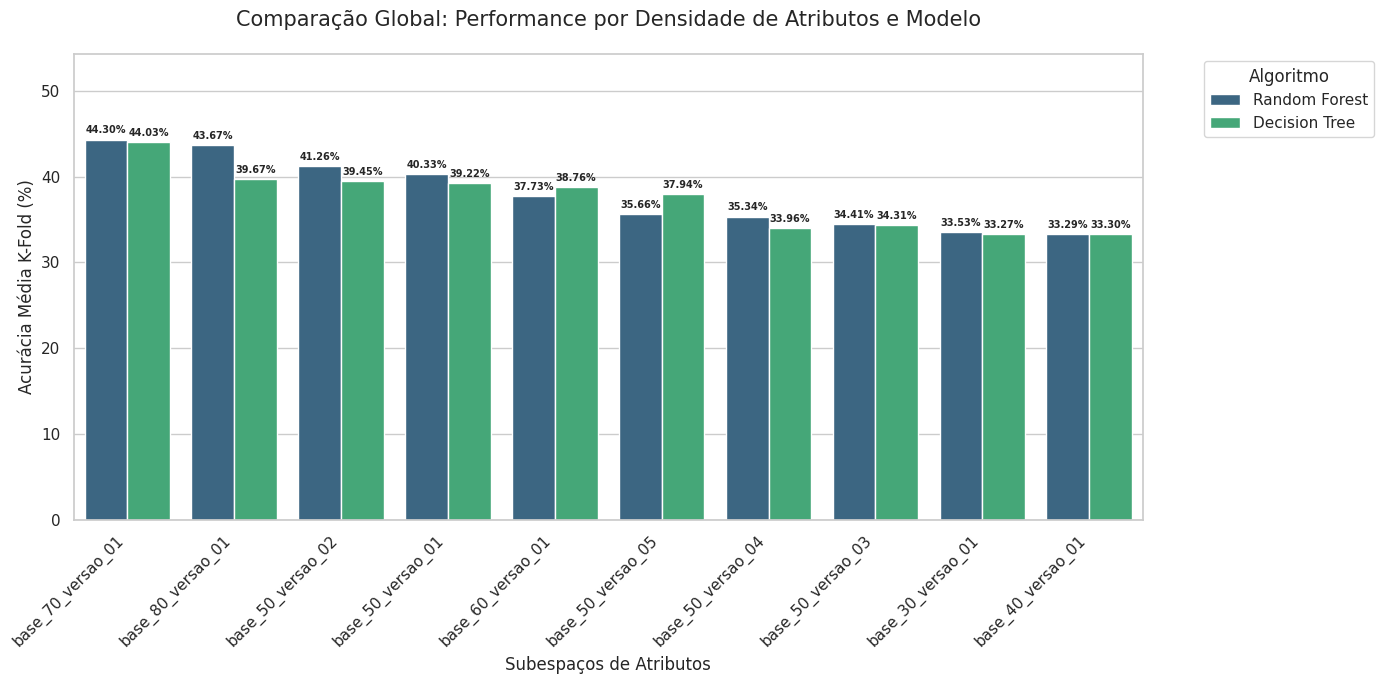

In [115]:

# Configuração do estilo
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 7))

# Criando o gráfico de barras
ax = sns.barplot(
    data=df_final_experimentos,
    x='Dataset',
    y='Acc Média K-Fold (%)',
    hue='Modelo',
    palette='viridis'
)

# Adicionando os valores em cima de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', padding=3, fontsize=7, fontweight='bold')

# Ajustes estéticos
plt.xticks(rotation=45, ha='right')
plt.ylim(0, df_final_experimentos['Acc Média K-Fold (%)'].max() + 10) # Dá espaço para o texto no topo
plt.title('Comparação Global: Performance por Densidade de Atributos e Modelo', fontsize=15, pad=20)
plt.ylabel('Acurácia Média K-Fold (%)', fontsize=12)
plt.xlabel('Subespaços de Atributos', fontsize=12)
plt.legend(title='Algoritmo', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## Otimização de Hiperparâmetros (Grid Search)

Após a análise global, identificamos que a **base_70_versao_01** obteve o melhor desempenho. Agora, realizaremos um **Grid Search** para encontrar a combinação ideal de parâmetros para o Random Forest, buscando elevar ainda mais a acurácia.

**Parâmetros em teste:**
* `n_estimators`: Quantidade de árvores na floresta.
* `max_depth`: Profundidade máxima das árvores (evita overfitting).
* `min_samples_split`: Número mínimo de amostras para dividir um nó.
* `criterion`: Função para medir a qualidade da divisão (Gini vs. Entropy).

> **Validação:** O Grid Search utilizará Cross-Validation interna para garantir que os parâmetros escolhidos sejam robustos.

In [117]:
# 1. Isolar os dados da melhor base (70%)
df_gridsearch = bases_70['base_70_versao_01']
X_gridsearch = df_gridsearch.drop(columns=[col_classe]).values
y_gridsearch = df_gridsearch[col_classe].values

# 2. Definir o espaço de busca de parâmetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# 3. Configurar o Grid Search com 5-fold CV (para ser mais rápido que 10)
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=0),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1 # Usa todos os núcleos do processador
)

print("⏳ Iniciando busca pelos melhores parâmetros (isso pode levar alguns minutos)...")
grid_search.fit(X_gridsearch, y_gridsearch)



⏳ Iniciando busca pelos melhores parâmetros (isso pode levar alguns minutos)...


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [118]:
# 4. Resultados
print(f"\n✅ Melhor Acurácia encontrada: {grid_search.best_score_*100:.2f}%")
print(f"⚙️ Melhores Parâmetros: {grid_search.best_params_}")



✅ Melhor Acurácia encontrada: 44.26%
⚙️ Melhores Parâmetros: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [119]:
# Guardar o melhor modelo treinado
melhor_modelo_final = grid_search.best_estimator_